In [1]:
%matplotlib notebook

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

QUESTIONS

1. Popular varietals:
a) what regions produce highest quantity cabernet, merlot, blended varietals?
b) Of all the wines in the dataset, what is the most common/least common varietal in the top ten/or top 10% rated wines?
c) the least common varietal in the top 10/10% - does that make it more valuable because it is less common AND made it to the top?
2. BLENDS:
a) blends are said to be more complex and enhanced flavors - are blends frequently in the top rated wines? 
b) Is it more expensive to make blends because you have to experiment with combinations? 
c) does that make the wine itself more expensive? 
d. What regions produce the highest quantity of blends OR highest rated blends?

POSSIBLE DATA SET ISSUES

1. Who is using this ratings app?
a) For example, if it is not heavily used in one particular country, say France, are we getting an accurate picture of preference? Would a French person rate an wine from the United States lower because of bias?

In [3]:
wine_df = pd.read_csv('Wine_data.csv', encoding="ISO-8859-1")

wine_df.head(20)

,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
0,IV,93.433789,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e3e942360030000000e
1,Layor Gold,90.627673,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e00942360030000000d
2,The Evangelist - Late Harvest Viognier,89.971973,Ascension Cellars,Central Coast,CA,USA,Viognier,2012,Dessert,White,5564efe1b4f0c10300000058
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
4,"Dalliance ""GSMv""",89.421973,Ascension Cellars,Central Coast,CA,USA,"Grenache, Syrah, Mourvedre, Viognier",2011,NaN,Red,5564efe1b4f0c1030000009b
5,Estate Show Pony Paso Robles Red Cedar Vineyard,88.997799,Clayhouse Wines,San Luis Obispo,CA,USA,Petite Sirah,2012,NaN,Red,5564efe1b4f0c10300000004
6,"Ascendance ""Melange""",88.939649,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Merlot",2011,NaN,Red,5564efe1b4f0c10300000036
7,Halo Viognier,88.832579,Ascension Cellars,Central Coast,CA,USA,Viognier,2014,NaN,White,5564efe1b4f0c10300000035
8,Duca Bortini Vaporello 2014,88.182936,Duca Bortini,Trentino,Trentino,Italy,"Lambrusco, Merlot",2014,NaN,Red,5e673b734d42ee2d694c0703
9,Chateau Cailleteau Bergeron OZ de Cailleteau 2015,88.121973,Chateau Cailleteau Bergeron,Blaye Cotes de Bordeaux,NaN,France,Bordeaux Red Blend,2015,NaN,Red,5e4c9868c2f8c4663fc3d28a


In [4]:
#Data Cleanup
wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})
cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]


In [9]:
# Store Variables

# All varietals split from their commas in the cell
varietals_split = cleaned_df['Varietal'].str.split(',\s+', expand=True).stack().value_counts()
print(varietals_split)

# Count of varietals by country
varietals_count = cleaned_df.groupby('Country').count()['Varietal']
print(varietals_count)

# Count of wineries by country
winery_count = cleaned_df.groupby('Country').count()['Winery']

# Average rating of wines in each country
wine_rating = cleaned_df.groupby('Country').mean()['Rating']



Cabernet Sauvignon                 2027
Pinot Noir                         1435
Merlot                             1364
Chardonnay                         1337
Syrah                              1106
                                   ... 
Pinot Meuniers                        1
cinsault                              1
Petit Sirah Petit Verdot              1
Petite Sirah,Cabernet Sauvignon       1
Sauvignon Blanc Assyrtiko             1
Length: 1059, dtype: int64
Country
Argentina          420
Australia          459
Austria             65
Brazil               1
Bulgaria             2
Canada            2522
Chile              311
China                1
Croatia             12
France            1675
Georgia              1
Germany            172
Greece              24
Hungary             23
India                3
Israel              14
Italy             1589
Lebanon             11
Luxembourg           2
Mexico               8
Moldova              1
Netherlands          1
New Zealand        

In [13]:
# df options

# Count of wineries by country
winery_count_df = pd.DataFrame({'Winery Count': winery_count})

# Average rating of wines in each country
wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})

# Count of varietals by country
varietals_count_df = pd.DataFrame({'Varietals Count':varietals_count})
varietals_count_df

# Top Varietals (Varietals that appear most frequently in our dataset)
varietals_split_df = pd.DataFrame({'Top Varietals': varietals_split })
varietals_split_df

,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
...,...
Pinot Meuniers,1
cinsault,1
Petit Sirah Petit Verdot,1
"Petite Sirah,Cabernet Sauvignon",1


In [49]:
# Top 10 Options

# Variale for top 10 wine producing countries
top10_country = winery_count_df.nlargest(10, 'Winery Count') 

# Variable for top 10 rating on wines
top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')

# Variable for count of varietals in our top 10 countries 
top10_varietals_df = varietals_count_df.nlargest(10, 'Varietals Count')
top10_varietals_df

# # Variable for split varietals (most frequently listed in our dataset)
# top10_varietals_split = varietals_split_df.nlargest(10, 'Top Varietals')
# top10_varietals_split



,Varietals Count
Country,
USA,4155
Canada,2522
France,1675
Italy,1589
Spain,580
Australia,459
Argentina,420
Chile,311
New Zealand,238


In [16]:
# Merged df
merge_df = top10_country.merge(wine_rating_df, on = 'Country')
merge_varietals_df = merge_df.merge(varietals_count_df, on = 'Country')
merge_varietals_df


,Winery Count,Wine Rating,Varietals Count
Country,,,
USA,4211,77.101990,4155
Canada,2555,76.416850,2522
France,1716,76.952722,1675
Italy,1605,76.844544,1589
Spain,588,76.671740,580
Australia,460,76.146005,459
Argentina,421,75.767816,420
Chile,311,75.813061,311
New Zealand,241,76.859121,238


<IPython.core.display.Javascript object>


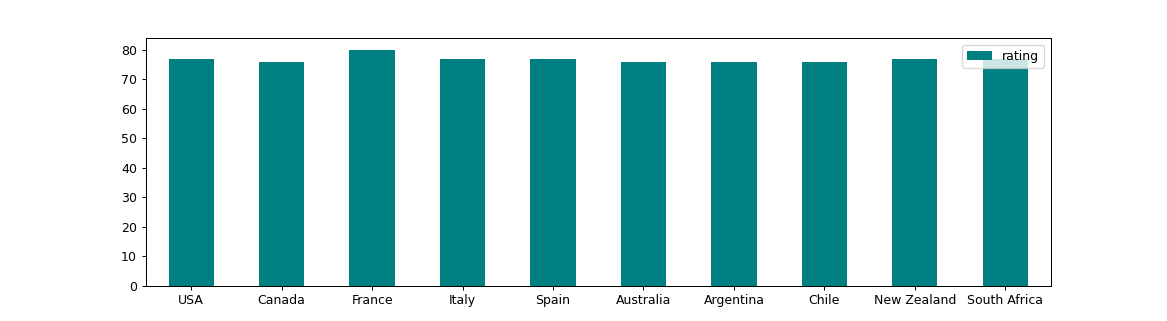

In [66]:
# Plot for Average Wine Rating in Top Ten Countries

# -----------------------from pandas plot hw - tailor it----------------------------
# Set x axis and tick locations
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
# -----------------------from pandas plot hw - tailor it----------------------------


# --------------> how do i ref top10_country as the index instead of listing the countries
country = ["USA", "Canada", "France", "Italy", "Spain", "Australia", "Argentina", "Chile", "New Zealand", "South Africa"]
rating = [77,76,80,77,77,76,76,76,77,77]
index = ["USA", "Canada", "France", "Italy", "Spain", "Australia", "Argentina", "Chile", "New Zealand", "South Africa"]
toprating = pd.DataFrame({"country": country,
                   "rating": rating}, index=index)

plot = toprating.plot.bar(rot=0, figsize=(12,2), facecolor="teal")

<IPython.core.display.Javascript object>


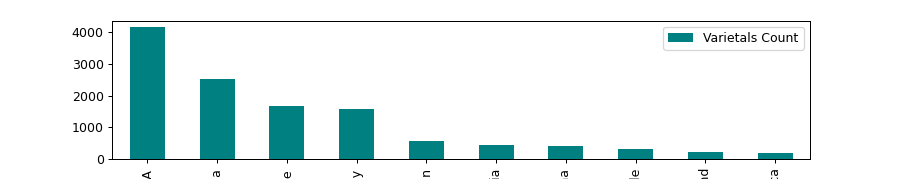

In [57]:
# Plot for Count of Varietals / Blends in the Top Ten Wine Producing Countries

top10varplot = top10_varietals_df.plot.bar(rot=90, figsize=(10,2), facecolor="teal")
# plt.title("Count of Varietals/Blends in Top Ten Countries")
# plt.xlabel("Varietals")
# plt.ylabel("Total Count")

<IPython.core.display.Javascript object>


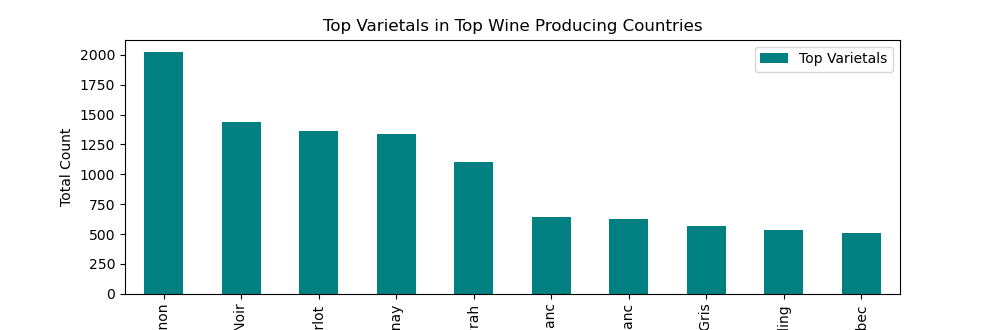

Text(0, 0.5, 'Total Count')

In [40]:

# Plot for Top Ten Varietal Types in the Top Ten Wine Producing Countries

top10varplot = top10_varietals_split.plot.bar(rot=90, figsize=(10,2), facecolor="teal")
plt.title("Top Varietals in Top Wine Producing Countries")
plt.xlabel("Varietals")
plt.ylabel("Total Count")



